### Курсовой проект Андрианова А.Ю. по теме _"Библиотеки Python для Data Science Numpy, Matplotlib, Scikit-learn"_

In [1]:
# Загружает необходимые модули
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime as dt

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV

#  Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [2]:
# Путь к файлам
TRAINDATASET_PATH = './train.csv'
PREPARED_TRAINDATASET_PATH = './train_prepared.csv'

TESTDATASET_PATH = './test.csv'
PREPARED_TESTDATASET_PATH = './test_prepared.csv'
SUBMISSION_PATH = './submission.csv'

REPORTS_FILE_PATH = './reports/'
SCALER_FILE_PATH = './models/scaler.pkl'
MODEL_FILE_PATH = './models/model.pkl'

## Обработка и визуализация данных

In [3]:
# Загрузим данные и посмотрим на них
df_train = pd.read_csv(TRAINDATASET_PATH, sep=',')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

В датасете присутствуют признаки с отсутствующими данными, которые необходимо будет заполнить. Так же присутстувует данные типа object, которые изменим. 

#### Id

In [6]:
# Удалим столбец Id так как толезных данных внём скорее всего не будет.
df_train = df_train.drop(columns='Id')

#### Целевая переменая Price

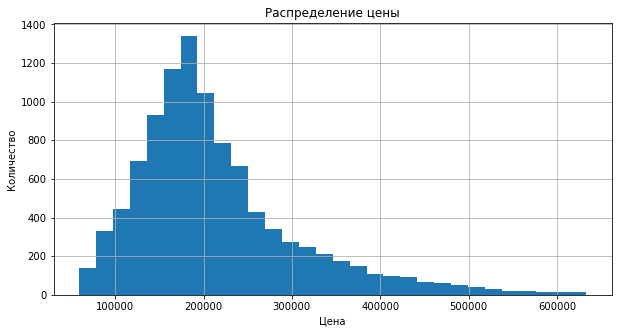

In [7]:
# Расмотрим целевую переменую Price
plt.figure(figsize = (10, 5))

df_train['Price'].hist(bins=30)
plt.ylabel('Количество')
plt.xlabel('Цена')

plt.title('Распределение цены')
plt.show()

На графике отсутствуют резкие и не типичные изменения цены, что может говорить об отсутствии выбрасов

#### Rooms

In [8]:
pd.DataFrame(df_train.groupby('Rooms').median()['Square'])

,Square
Rooms,
0.0,65.487474
1.0,40.406590
2.0,55.841812
3.0,77.413643
4.0,98.668054
5.0,116.084861
6.0,59.414334
10.0,59.964120
19.0,42.006046


В данных пресутствуют квартиры с нулевым количеством комнат и с большим количеством комнат.
Площадь квартиры должна соотноситься с количеством комнат.
Кваритры с количеством комнат больше 5 значительно уступают по площади кваритам с 5 комнатами.
Вероятнее всего это выбросы.

In [9]:
spam = (df_train['Rooms'] >= 1)  & (df_train['Rooms'] <= 5)

mdn_rm = df_train.loc[spam, 'Rooms'].median()
df_train.loc[~spam, 'Rooms'] = mdn_rm

#### Square

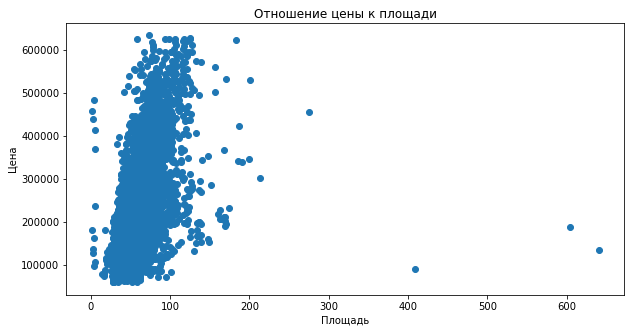

In [10]:
# Посмотрим Square
plt.figure(figsize=(10, 5))

plt.scatter(df_train['Square'], df_train["Price"])

plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Отношение цены к площади')
plt.show()

На графике видно что наблюдения сгрупированы в одну большую группу. Значения возле нуля и более 300 вероятнее всего являются выбросами.

In [11]:
# Определим значения выбросов как квартили 0.5%
div_pr_sq = df_train['Square'] / df_train['Price']
r_pr_sq = div_pr_sq[(div_pr_sq > div_pr_sq.quantile(q=0.001)) & (div_pr_sq < div_pr_sq.quantile(q=0.999))]

# Определим медианое отношенние площади к цене
rt_pr_sq = (r_pr_sq).median() 

# Преобразуем выбросы 

df_train.loc[(div_pr_sq < div_pr_sq.quantile(q=0.001)) | (div_pr_sq > div_pr_sq.quantile(q=0.999)), 'Square'] = df_train.loc[(div_pr_sq < div_pr_sq.quantile(q=0.001)) | (div_pr_sq > div_pr_sq.quantile(q=0.999)), 'Price'] * rt_pr_sq

In [12]:
df_train[['Square']].sort_values(by='Square').head(5)

,Square
8805,4.380726
5009,4.633498
9286,13.784865
5870,16.117154
3686,16.547242


In [13]:
# Квартиры меньше 13 метров верояние всего являются выбрросами, огранием возможные данные этим значением.
# Так же максимально возможножные квартиры сделаем 500м. 
df_train['Square'] = np.clip(df_train['Square'], a_min=13, a_max=500) 

#### LifeSquare и KitchenSquare

In [14]:
# Заполним отсутствующие значения в LifeSquare.
# Определим среднее значение отношения жилой площади к общей.
# Домножим это отношение к значению общей площади в наблюдении.
# Но сначало, сделаем новый столбец где отметим что LifeSquare был пустой
em_lsq = df_train['LifeSquare'].isnull()
df_train.loc[em_lsq, 'LifeSquare_is_null'] = 1
df_train.loc[~em_lsq, 'LifeSquare_is_null'] = 0
rt_lsq = (df_train.loc[~em_lsq, 'LifeSquare'] / df_train.loc[~em_lsq, 'Square']).median() 
df_train.loc[em_lsq, 'LifeSquare'] = df_train.loc[em_lsq, 'Square'] * rt_lsq

In [15]:
# В выборке пресутствуют занчения LifeSquare и KitchenSquare больше общей площади
# Это явно выбросы, так же сумма их не может привышать общию площадь.
lsq = df_train['LifeSquare']
ksq = df_train['KitchenSquare']
sq = df_train['Square']

# Сделаем коэффициенты для площадей без выбрасов
rt_lsq = (df_train.loc[sq > lsq + ksq, 'LifeSquare'] / df_train.loc[sq > lsq + ksq, 'Square']).median() 
rt_ksq = (df_train.loc[sq > lsq + ksq, 'KitchenSquare'] / df_train.loc[sq > lsq + ksq, 'Square']).median() 

df_train.loc[lsq > sq, 'LifeSquare'] = df_train.loc[lsq > sq, 'Square'] * rt_lsq
df_train.loc[ksq > sq, 'KitchenSquare'] = df_train.loc[ksq > sq, 'Square'] * rt_ksq

# Для отличающийся суммы сделаем ещё коэффициенты
sum_lsq_ksq = df_train.loc[sq > lsq + ksq, 'LifeSquare'] + df_train.loc[sq > lsq + ksq, 'KitchenSquare']

rt_sum_sq = (sum_lsq_ksq / df_train.loc[sq > lsq + ksq, 'Square']).median() 
rt_lsq_sum = ( df_train.loc[sq > lsq + ksq,  'LifeSquare'] / sum_lsq_ksq).median()
rt_ksq_sum = ( df_train.loc[sq > lsq + ksq, 'KitchenSquare'] / sum_lsq_ksq).median()

df_train.loc[lsq + ksq > sq, 'LifeSquare'] = df_train.loc[lsq + ksq > sq, 'Square'] * rt_sum_sq * rt_lsq_sum
df_train.loc[lsq + ksq > sq, 'KitchenSquare'] = df_train.loc[lsq + ksq > sq, 'Square'] * rt_sum_sq * rt_ksq_sum 

In [16]:
# Площадь кухни меньше 3 м скарее всего является выбросами, саменим их на медианыые значения
# Ещё ограничем максимальный размер кухни в 30 м
mnd_ksq = ksq.median()
df_train.loc[ksq < 3, 'KitchenSquare'] = mnd_ksq
df_train.loc[ksq > 30, 'KitchenSquare'] = 30

In [17]:
# Ограничем максимальный и минимальный возможные жилые площади
df_train['LifeSquare'] = np.clip(df_train['LifeSquare'], a_min=10, a_max=500) 

#### HouseYear

In [18]:
# Год строительсво дома, заменим на его возраст
df_train['HouseYear'] = dt.today().timetuple()[0] - df_train['HouseYear'] 
df_train['HouseYear'][df_train['HouseYear'] < 0]

8828       -2947
9163   -20049990
Name: HouseYear, dtype: int64

In [19]:
# В выборке пресутствуют дома с отрицательным возрастом исправим эти значения на медианные
mdn_hsyr = df_train.loc[df_train['HouseYear'] > 0, 'HouseYear'].median()
df_train.loc[df_train['HouseYear'] < 0, 'HouseYear'] = mdn_hsyr
# Так же мало вероятно что будут дома с возрастом более 200 лет
# Ограничем этим возрастом данные
df_train.loc[df_train['HouseYear'] > 200, 'HouseYear'] = mdn_hsyr

#### Social_3

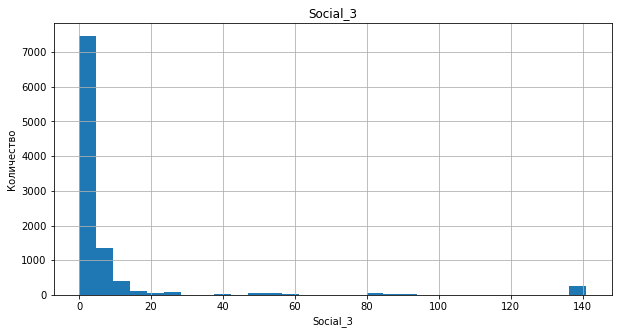

In [20]:
plt.figure(figsize = (10, 5))

df_train['Social_3'].hist(bins=30)
plt.ylabel('Количество')
plt.xlabel('Social_3')

plt.title('Social_3')
plt.show()

На графике виден большой хвост справа, с резгим ростом показателей у 141. Скорее всего это выбросы.

In [21]:
# Ограничем максимально возможные данные 80-ю
df_train['Social_3'] = np.clip(df_train['Social_3'], a_min=0, a_max=80) 

#### Ecology_2, Ecology_3 и Shops_2

In [22]:
# Ecology_2, Ecology_3 и Shops_2 типа object, их можно заменить на числовые значения.
print(df_train['Ecology_2'].unique(), df_train['Ecology_3'].unique(), df_train['Shops_2'].unique())

['B' 'A'] ['B' 'A'] ['B' 'A']


In [23]:
# Значание 'A' будет 0, "В" - 1
def tf_to_num(data, feature):
    data[feature]
    data.loc[data[feature]== 'B', feature] = 1
    data.loc[data[feature]== 'A', feature] = 0
    data[feature] = data[feature].astype(np.int8)

tf_to_num(df_train, 'Ecology_2')
tf_to_num(df_train, 'Ecology_3')
tf_to_num(df_train, 'Shops_2')

#### Healthcare_1

In [24]:
# Заполним отсутствующие значения в Healthcare_1 медианными значениями
f_hc1 = df_train['Healthcare_1'].notnull()
em_hc1 = df_train['Healthcare_1'].isnull()

df_train.loc[em_hc1, 'Healthcare_1_is_null'] = 1
df_train.loc[f_hc1, 'Healthcare_1_is_null'] = 0

mdn_hc1 = df_train.loc[f_hc1, 'Healthcare_1'].median()

df_train.loc[em_hc1, 'Healthcare_1'] = mdn_hc1

## Создание новых признаков

In [25]:
# Создадим дополнительный признак который будет указыватвать среднию цену квартиры в районе.
mdn_dst_pr = df_train.groupby('DistrictId', as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedDistrictPrice'})

mdn_dst_pr.head()

,DistrictId,MedDistrictPrice
0,0,165963.054142
1,1,183663.443595
2,2,208539.501373
3,3,169094.013281
4,4,278639.482329


In [26]:
df_train = df_train.merge(mdn_dst_pr, on='DistrictId', how='left')

## Построение модели

In [27]:
# Разобьём датасет для обучения модели.
X_train = df_train.drop(columns='Price')
Y_train = df_train['Price']

In [28]:
# Сделаем функциию для проверки различных моделей
def checking_models(X, y):
    # Линенйная регрессия
    lr_model = LinearRegression()
    lr_model.fit(X, y)

    y_preds = lr_model.predict(X)
    # Ограничим модель максимальным и минимальным значениями в выборке
    y_preds = np.clip(y_preds, a_min=np.min(y), a_max=np.max(y)) 

    print(f"Линенйная регрессия\nR2 = {round(r2(y, y_preds), 3)}")
    
    # Дерево решений
    dt_model = DecisionTreeRegressor(criterion='mse', 
                                 random_state=74)

    params_tree = {'max_depth':[7, 8, 9],
                  'min_samples_leaf':[11, 12, 13]
                  }

    gs_tree = GridSearchCV(dt_model, params_tree, 
                          scoring='r2', # метрика 
                          cv=KFold(n_splits=5,  # k кол-во разбиений в кросс-валидации
                                   random_state=37, 
                                   shuffle=True),
                          n_jobs=-1
                          )
    gs_tree.fit(X, y)
    print(f"\nДерево решений\nЛучшее параметры = {gs_tree.best_params_}\nR2 = {round(gs_tree.best_score_, 3)}")
    
    # Случайный лес
    rf_model = RandomForestRegressor(criterion='mse',
                                 random_state=74,
                                 )
    params_forest = {'max_depth':[14, 15, 16],
                     'min_samples_leaf':[4, 3, 6],
                     'n_estimators':[260, 270, 280]
                    }

    gs_forest = GridSearchCV(rf_model, params_forest, 
                          scoring='r2', 
                          cv=KFold(n_splits=5,  
                                   random_state=37, 
                                   shuffle=True),
                          n_jobs=-1
                          )
    gs_forest.fit(X, y)
    print(f"\nСлучайный лес\nЛучшее параметры = {gs_forest.best_params_}\nR2 = {round(gs_forest.best_score_, 3)}")
    
    # Градиентный Бустинг    
    gb_model = GradientBoostingRegressor(criterion='mse',
                          random_state=74,
                         )
    params_boost = {'n_estimators':[190, 200, 210], 
          'max_depth':[4, 5, 6],
          'min_samples_leaf':[9, 10, 11]
        }

    gs_boost = GridSearchCV(gb_model, params_boost, 
                      scoring='r2', 
                      cv=KFold(n_splits=5,   
                               random_state=37, 
                               shuffle=True),
                      n_jobs=-1
                      )
    gs_boost.fit(X, y)
    print(f"\nГрадиентный Бустинг\nЛучшее параметры = {gs_boost.best_params_}\nR2 = {round(gs_boost.best_score_, 3)}")

In [29]:
# Страка закоментирована, так как требует много ресурсов и не влияит на финальный результат
#checking_models(X_train, Y_train)

Линенйная регрессия

R2 = 0.67


Дерево решений

Лучшее параметры = {'max_depth': 8, 'min_samples_leaf': 12}

R2 = 0.698


Случайный лес

Лучшее параметры = {'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 280}

R2 = 0.755


Градиентный Бустинг

Лучшее параметры = {'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 200}

R2 = 0.772


Лучшей моделью является "Градиентный Бустинг". 

In [30]:
# Выберим для обучения модель  "Градиентный Бустинг". 
# Гиперпораметры возьмём из наилилутших результотов полученых в сетке 
final_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=10,
                                     random_state=74,  
                                     n_estimators=200)
final_model.fit(X_train, Y_train)

y_train_preds = final_model.predict(X_train)

In [31]:
# Сделаем функцию для оценки полученых результатов
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
    
    plt.figure(figsize=(6,6))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

R2:	0.875


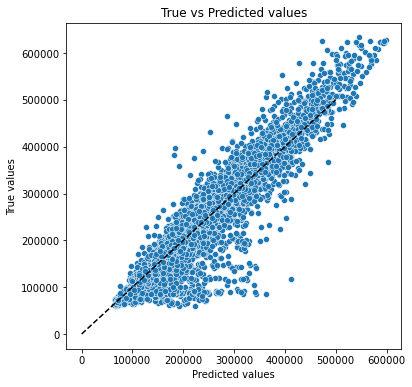

In [32]:
evaluate_preds(Y_train, y_train_preds)

Полученые данные имеют очень маленькую ошибку, что говорит о хорошем результате.

In [33]:
# Сделаем крос валидации, для ещё одной оценки модели
cv_score = cross_val_score(final_model, X_train, Y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=37))
print(cv_score)
print(round(cv_score.mean(), 5))

[0.76505728 0.75902836 0.75660241]
0.76023


По r2 видно что начинается переобучение, но результат всё ещё очень хороший.

In [34]:
# Посмотрим наибольший вклад различных параметров в модель
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.452329
20,MedDistrictPrice,0.333459
1,Rooms,0.030372
13,Social_3,0.027237
7,HouseYear,0.023843
11,Social_1,0.023482
4,KitchenSquare,0.019278
12,Social_2,0.015984
14,Healthcare_1,0.013559
3,LifeSquare,0.012283


Некотрые признаки имеют малый вес, но избавлятся от них не будем так как они дают положительный эффект, и не сильно загружают ресурсы.

### Работа с тестовами данными

In [35]:
# Загрузим тестовые данные и расмотрим их
df_test = pd.read_csv(TESTDATASET_PATH, sep=',')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [36]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Так же как и в трайн датасете, в тестовом датасете есть пропуски в данных. Работа данными будет происходить аналогично.

#### Id

In [38]:
# Скапируем данные Id для формирования финальных данных и затем удалим столбец Id из основного дата сета.
test_id = df_test['Id']
df_test = df_test.drop(columns='Id')

#### Rooms

In [39]:
# В данных пресутствуют кравтиры с нуливым количеством комнат заменим эти значения на медианные
df_test.loc[df_test['Rooms'] < 1, 'Rooms'] = mdn_rm 
df_test['Rooms'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., 17.])

In [40]:
# Посмотрим квартиры с большим количеством комнат
pd.DataFrame(df_test.groupby('Rooms').median()['Square'])

,Square
Rooms,
1.0,40.117689
2.0,55.839848
3.0,77.679279
4.0,95.144246
5.0,120.330727
6.0,167.101957
17.0,52.866107


In [41]:
# В тестовых данных квартиры с 6 комнатами имеют большию площадь чем квартиры с 5 комнатами
# Эти данные оставим и изменим то что больше них
df_train.loc[df_train['Rooms'] > 6, 'Rooms'] = mdn_rm

#### Square

In [42]:
# Данные по цене отсутствуют, так что просто ограничим данные по площади
df_test['Square'] = np.clip(df_test['Square'], a_min=13, a_max=500) 

#### LifeSquare и KitchenSquare

In [43]:
# Сделаем преобразования анологичный трайну

f_lsq = df_test['LifeSquare'].notnull()
em_lsq = df_test['LifeSquare'].isnull()
df_test.loc[em_lsq, 'LifeSquare_is_null'] = 1
df_test.loc[f_lsq, 'LifeSquare_is_null'] = 0
 
df_test.loc[em_lsq, 'LifeSquare'] = df_test.loc[em_lsq, 'Square'] * rt_lsq

In [44]:
lsq = df_test['LifeSquare']
ksq = df_test['KitchenSquare']
sq = df_test['Square']

df_test.loc[lsq > sq, 'LifeSquare'] = df_test.loc[lsq > sq, 'Square'] * rt_lsq
df_test.loc[ksq > sq, 'KitchenSquare'] = df_test.loc[ksq > sq, 'Square'] * rt_ksq

sum_lsq_ksq = df_test.loc[sq > lsq + ksq, 'LifeSquare'] + df_test.loc[sq > lsq + ksq, 'KitchenSquare']

df_test.loc[lsq + ksq > sq, 'LifeSquare'] = df_test.loc[lsq + ksq > sq, 'Square'] * rt_sum_sq * rt_lsq_sum
df_test.loc[lsq + ksq > sq, 'KitchenSquare'] = df_test.loc[lsq + ksq > sq, 'Square'] * rt_sum_sq * rt_ksq_sum  

In [45]:
df_test.loc[df_test['KitchenSquare'] < 3, 'KitchenSquare'] = df_train['KitchenSquare'].median()

In [46]:
df_test['LifeSquare'] = np.clip(df_test['LifeSquare'], a_min=10, a_max=500) 

#### HouseYear

In [47]:
# Для замены данных будет применяться медиана из трайн данных
df_test['HouseYear'] = dt.today().timetuple()[0] - df_test['HouseYear'] 
df_test.loc[df_train['HouseYear'] < 0, 'HouseYear'] = mdn_hsyr
df_test.loc[df_train['HouseYear'] > 200, 'HouseYear'] = mdn_hsyr

#### Social_3

In [48]:
# Ограничения будут теже что и трайн данных
df_test['Social_3'] = np.clip(df_test['Social_3'], a_min=0, a_max=80) 

#### Ecology_2, Ecology_3 и Shops_2

In [49]:
# Сделаем теже операции что и для тейн данных
print(df_test['Ecology_2'].unique(), df_test['Ecology_3'].unique(), df_test['Shops_2'].unique())

['B' 'A'] ['B' 'A'] ['B' 'A']


In [50]:
def tf_to_num(data, feature):
    data[feature]
    data.loc[data[feature]== 'B', feature] = 1
    data.loc[data[feature]== 'A', feature] = 0
    data[feature] = data[feature].astype(np.int8)

tf_to_num(df_test, 'Ecology_2')
tf_to_num(df_test, 'Ecology_3')
tf_to_num(df_test, 'Shops_2')

#### Healthcare_1

In [51]:
# Заполним отсутствующие значения в Healthcare_1 медианой из трайн данных
f_hc1 = df_test['Healthcare_1'].notnull()
em_hc1 = df_test['Healthcare_1'].isnull()

df_test.loc[em_hc1, 'Healthcare_1_is_null'] = 1
df_test.loc[f_hc1, 'Healthcare_1_is_null'] = 0

df_test.loc[em_hc1, 'Healthcare_1'] = mdn_hc1

#### MedDistrictPrice

In [52]:
# Добавим данные по ценам в квартале в тестовые данные. 
# Если id квартала нету то внесём медианые значения
df_test = df_test.merge(mdn_dst_pr, on='DistrictId', how='left')
mdn_mpd = df_train['MedDistrictPrice'].median()
df_test.loc[df_test['MedDistrictPrice'].isnull(), 'MedDistrictPrice'] = mdn_mpd


## Предсказание цены

In [53]:
# Прескажим цену
y_test_preds = final_model.predict(df_test)
y_test_preds

array([171504.47142027, 120993.66594413, 145851.0830897 , ...,
       150287.85571041, 192256.21785717, 278809.7989045 ])

In [54]:
# Обединим цены с id
df_sumbission = pd.DataFrame({'Id': test_id, 'Price': y_test_preds})
df_sumbission

,Id,Price
0,4567,171504.471420
1,5925,120993.665944
2,960,145851.083090
3,3848,118694.166401
4,746,181855.295168
...,...,...
4995,10379,174482.182682
4996,16138,350320.705601
4997,3912,150287.855710
4998,5722,192256.217857


In [55]:
# Сохраним посучившуеся таблицу
df_sumbission.to_csv(SUBMISSION_PATH, index=False, encoding='utf-8', sep=',')